# Library / Packages

In [1]:
# basic library
import os
import pandas as pd
import numpy as np
import sys
import hashlib

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# complex math
from scipy import stats
from scipy.stats import skew, kurtosis

# data transform
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

In [3]:
pd.set_option('display.max_columns', None)

# Data Source

In [4]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['PREPARATION_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

cc_df = pd.DataFrame(loaded_data)
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   date                       294588 non-null  object        
 8   year                       294588 non-null  int32         
 9   quarter                    294588 non-null  object        
 10  month                      294588 non-null  object        
 11  season                     294588 non-null  object  

In [5]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,season,week_cat,day,time,limit_cat,transaction_dollar_amount,time_diff_hour,distance_km,geo_cat,speed_km/h,fraud
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,september,fall,weekday,friday,00:32:40,medium,43.78,0.00,9177.582847,anomaly,0.00,fraud
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,october,fall,weekend,saturday,22:23:08,medium,103.15,1053.84,9.838861,normal,0.01,not_fraud
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,18:19:36,medium,48.55,43.94,14.825103,normal,0.34,not_fraud
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,october,fall,weekday,thursday,19:41:10,medium,136.18,94.64,3.983158,normal,0.04,not_fraud
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,october,fall,weekday,monday,20:08:22,medium,71.82,96.45,14.843545,normal,0.15,not_fraud


# Data Visualization

## Basic Analyst

### Descriptive Analyst

In [6]:
# filter data for descriptive analyst
#===============================
descriptive_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
descriptive_data = descriptive_data.drop(columns = exclude_col, errors = 'ignore')

# Deskripsi statistik
#===============================
description = descriptive_data.describe(include = 'all').map(val_round)

mode = descriptive_data.mode().iloc[0].map(val_round)
variance = descriptive_data.var().map(val_round)
range_ = (descriptive_data.max() - descriptive_data.min()).map(val_round)
iqr = stats.iqr(descriptive_data)
coefficient_of_variation = (descriptive_data.std() / descriptive_data.mean()).map(val_round)
skewness = descriptive_data.skew().map(val_round)
kurtosis = descriptive_data.kurtosis().map(val_round)

# add data into description descriptive
#=======================================
description.loc['mode'] = mode
description.loc['variance'] = variance
description.loc['range'] = range_
description.loc['IQR'] = val_round(iqr)
description.loc['Coefficient of Variation'] = coefficient_of_variation
description.loc['Skewness'] = skewness
description.loc['Kurtosis'] = kurtosis

description

,transaction_dollar_amount,time_diff_hour,distance_km,speed_km/h
count,294.59 K,294.59 K,294.59 K,294.59 K
mean,86.01,718.54,311.33,4.09
std,124.66,519.21,1.76 K,312.95
min,0.01,0.00,0.02,0.00
25%,29.97,285.27,5.06,0.01
50%,58.47,628.51,7.92,0.01
75%,100.40,1.08 K,11.05,0.03
max,999.97,2.17 K,19.74 K,77.27 K
mode,24.15,0.00,0.02,0.01
variance,15.54 K,269.57 K,3.10 M,97.94 K


### Data Distribution

In [7]:
rows = cc_df.shape[0]
cols = cc_df.shape[1]

if rows <= 5000 or cols <= 20:
    category = "Small Dataset"

elif rows <= 50000 and cols <= 100:
    category = "Medium Dataset"

elif rows <= 1000000 and cols <= 500:
    category = "Large Dataset"

elif rows <= 10000000 and cols <= 1000:
    category = "Very Large Dataset"

else:
    category = "Massive Dataset"

print(f'Rows: {val_round(rows)}, Columns: {val_round(cols)}, then Dataset Category: {category.upper()}!!!')

Rows: 294.59 K, Columns: 22.00, then Dataset Category: LARGE DATASET!!!


#### Numeric Category

In [8]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year']
num_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

num_data.columns

Index(['transaction_dollar_amount', 'time_diff_hour', 'distance_km',
       'speed_km/h'],
      dtype='object')

##### Menguji Normalitas Data

In [9]:
# Anderson methode
from scipy.stats import anderson

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in num_data:
    # Lakukan uji Anderson-Darling
    result = anderson(cc_df[col], dist = 'norm')
    
    statistic_result = result.statistic
    critical_values = result.critical_values
    significance_levels = result.significance_level  # Tingkat signifikansi

    # Ambil nilai kritis pada tingkat signifikansi 5%
    critical_value_5_percent = critical_values[2]  # Indeks ke-2 untuk 5%
    print(f"Column: {col} \n")
    print(f"Statistic: {statistic_result}")
    print(f"Critical Value (5%): {critical_value_5_percent} \n")
    
    # Bandingkan nilai statistik dengan nilai kritis
    if statistic_result < critical_value_5_percent:
        print(f"Column {col}: Data berdistribusi normal\n")

    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: transaction_dollar_amount 

Statistic: 37362.67249053239
Critical Value (5%): 0.787 

Column transaction_dollar_amount: Data tidak berdistribusi normal

Column: time_diff_hour 

Statistic: 4221.60027299152
Critical Value (5%): 0.787 

Column time_diff_hour: Data tidak berdistribusi normal

Column: distance_km 

Statistic: 106988.84040317469
Critical Value (5%): 0.787 

Column distance_km: Data tidak berdistribusi normal

Column: speed_km/h 

Statistic: 112286.21090430091
Critical Value (5%): 0.787 

Column speed_km/h: Data tidak berdistribusi normal



In [10]:
# A'Agostino methode
from scipy.stats import normaltest

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in num_data:
    stat, p = normaltest(cc_df[col])
    print(f"Column: {col}, \nStatistics = {stat:.4f}, p = {p:.4f}")

    if p > 0.05:
        print(f"Column {col}: Data berdistribusi normal\n")
    
    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: transaction_dollar_amount, 
Statistics = 300585.0700, p = 0.0000
Column transaction_dollar_amount: Data tidak berdistribusi normal

Column: time_diff_hour, 
Statistics = 22971.5853, p = 0.0000
Column time_diff_hour: Data tidak berdistribusi normal

Column: distance_km, 
Statistics = 332981.8370, p = 0.0000
Column distance_km: Data tidak berdistribusi normal

Column: speed_km/h, 
Statistics = 1380548.2106, p = 0.0000
Column speed_km/h: Data tidak berdistribusi normal



##### Menguji Homogenitas Varians

In [11]:
from scipy.stats import levene, permutation_test
import numpy as np

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in num_data:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: \n{col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Jika ukuran sampel cukup besar, gunakan Levene Test
        stat, p = levene(group1, group2)
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel lebih kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.var() - y.var()),  # Uji perbedaan varians
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Varians antar kelompok homogen (Permutation Test)\n")

        else:
            print(f"Column {col}: Varians antar kelompok tidak homogen (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: 
transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.09, p = 0.7670
Column transaction_dollar_amount: Varians antar kelompok homogen

Column: 
time_diff_hour, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 5143.48, p = 0.0000
Column time_diff_hour: Varians antar kelompok tidak homogen

Column: 
distance_km, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.75, p = 0.3861
Column distance_km: Varians antar kelompok homogen

Column: 
speed_km/h, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 0.15, p = 0.7003
Column speed_km/h: Varians antar kelompok homogen



##### Menguji Perbandingan Rata-rata

In [12]:
from scipy.stats import mannwhitneyu, permutation_test
import numpy as np

# # Pilih kolom numerik
# numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in num_data:
    # Membagi data berdasarkan kategori 'season' (fall dan summer) dan menghapus NaN
    group1 = cc_df[cc_df['season'] == 'fall'][col].dropna().values
    group2 = cc_df[cc_df['season'] == 'summer'][col].dropna().values
    
    # Cek ukuran sampel sebelum melakukan uji statistik
    size1, size2 = len(group1), len(group2)
    print(f"Column: \n{col}, Ukuran group1 (fall): {size1}, Ukuran group2 (summer): {size2}")

    if size1 > 10 and size2 > 10:  # Pastikan ukuran sampel cukup besar
        # Lakukan Mann-Whitney U Test
        stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
        print(f"Statistics = {stat:.2f}, p = {p:.4f}")

        if p > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan\n")

    elif size1 > 5 and size2 > 5:  # Jika sampel kecil, gunakan Permutation Test
        result = permutation_test(
            (group1, group2), 
            statistic=lambda x, y: abs(x.mean() - y.mean()), 
            permutation_type='independent'
        )
        print(f"Permutation Test P-Value: {result.pvalue:.4f}")

        if result.pvalue > 0.05:
            print(f"Column {col}: Tidak ada perbedaan signifikan (Permutation Test)\n")

        else:
            print(f"Column {col}: Ada perbedaan signifikan (Permutation Test)\n")

    else:
        print(f"Column {col}: Ukuran sampel terlalu kecil untuk uji statistik. Coba gabungkan kategori atau kumpulkan lebih banyak data.\n")

Column: 
transaction_dollar_amount, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9898598720.50, p = 0.7270
Column transaction_dollar_amount: Tidak ada perbedaan signifikan

Column: 
time_diff_hour, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 8940681692.00, p = 0.0000
Column time_diff_hour: Ada perbedaan signifikan

Column: 
distance_km, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 9894365330.00, p = 0.8752
Column distance_km: Tidak ada perbedaan signifikan

Column: 
speed_km/h, Ukuran group1 (fall): 191040, Ukuran group2 (summer): 103548
Statistics = 10410080391.50, p = 0.0000
Column speed_km/h: Ada perbedaan signifikan



### Histogram

In [13]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['transaction_dollar_amount', 'time_diff_hour', 'distance_km',
       'speed_km/h'],
      dtype='object')

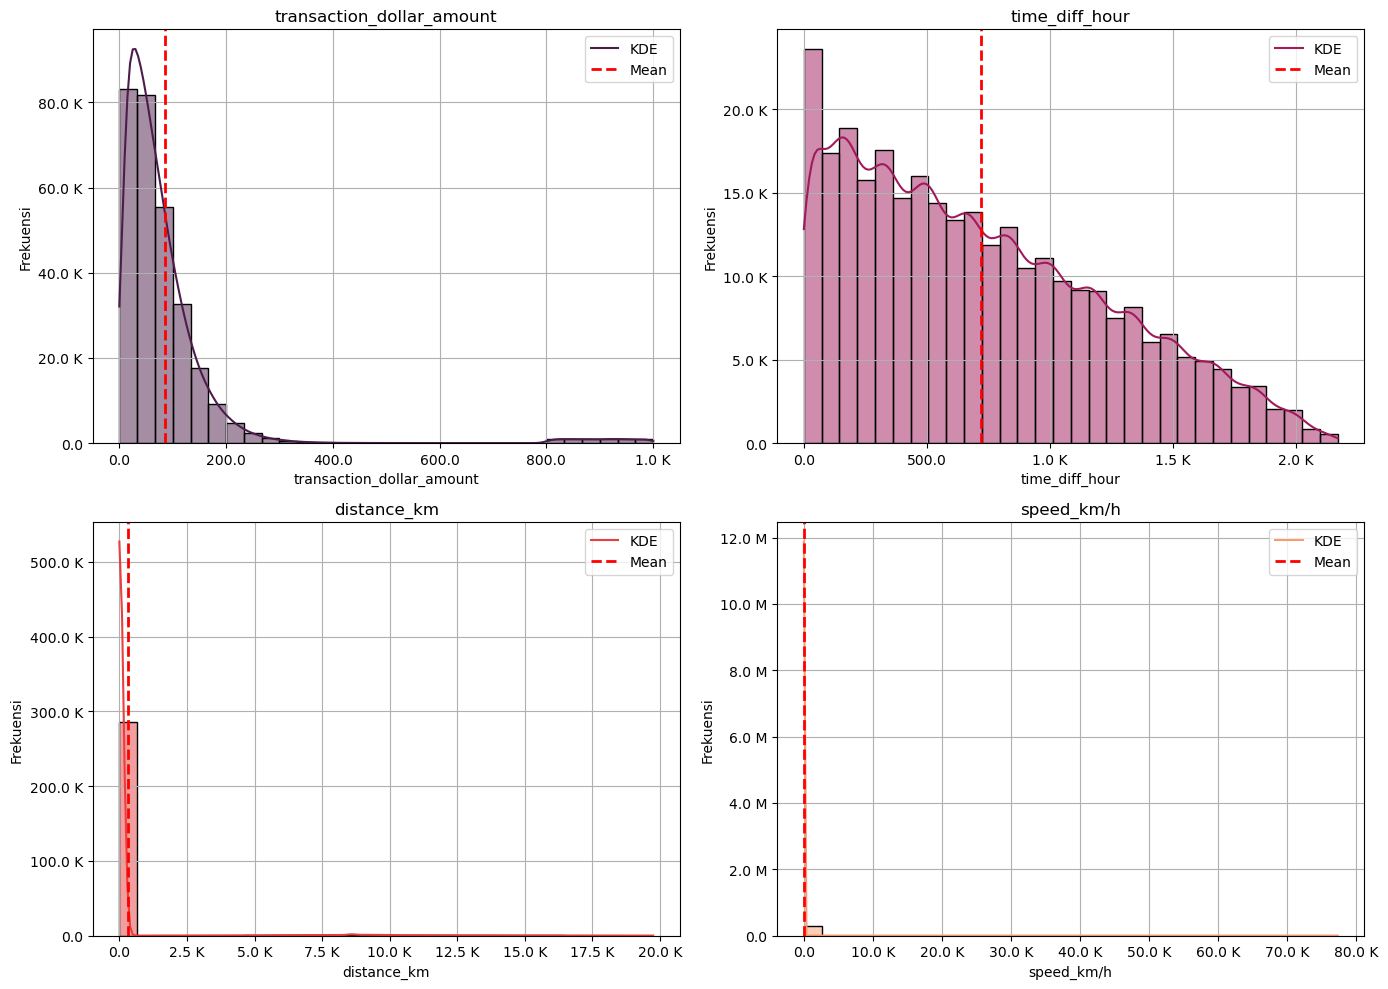

In [14]:
#
hist_data = hist_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 10))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Data Transformation

In [15]:
# log transform
# =====================
cc_df['log_transaction_dollar_amount'] = np.log1p(cc_df['transaction_dollar_amount'])
cc_df['log_distance_km'] = np.log1p(cc_df['distance_km'])
cc_df['log_speed_km/h'] = np.log1p(cc_df['speed_km/h'])

# square transform
# =====================
cc_df['square_time_diff_hour'] = np.sqrt(cc_df['time_diff_hour'])

# box-cox
# =====================
cc_df['box_cox_transaction_dollar_amount'], lambda_feature_transaction_dollar_amount = boxcox(cc_df['transaction_dollar_amount'] + 1)

In [16]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['log_transaction_dollar_amount', 'log_distance_km', 'log_speed_km/h',
       'square_time_diff_hour', 'box_cox_transaction_dollar_amount'],
      dtype='object')

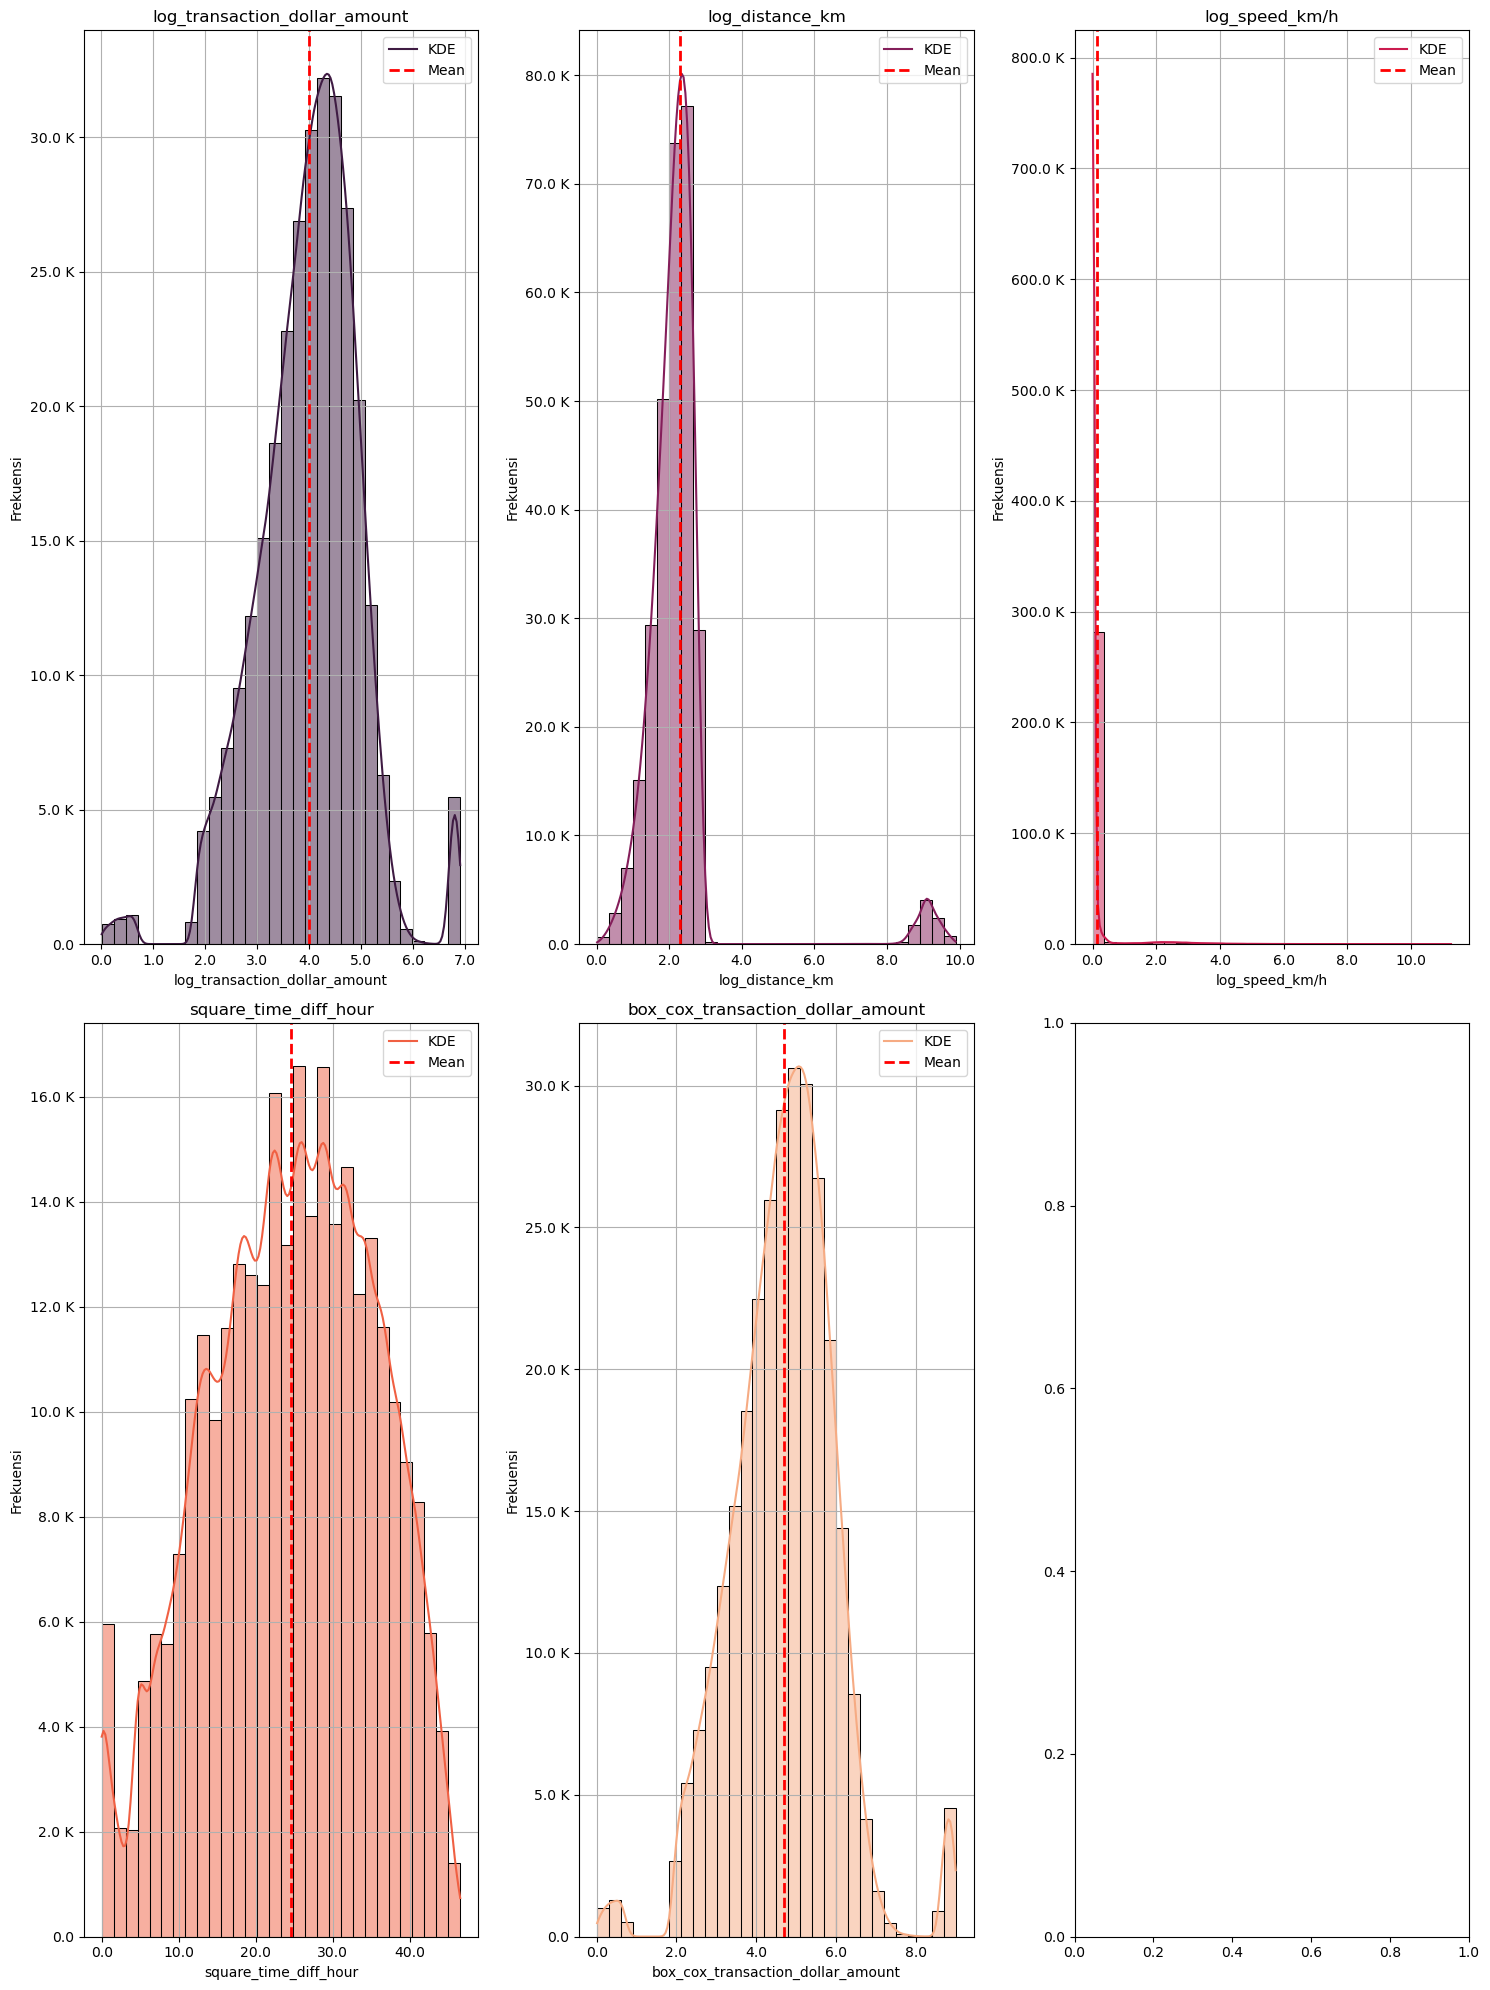

In [17]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 20))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [18]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h']
df_check = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   log_transaction_dollar_amount      294588 non-null  float64
 1   log_distance_km                    294588 non-null  float64
 2   log_speed_km/h                     294588 non-null  float64
 3   square_time_diff_hour              294588 non-null  float64
 4   box_cox_transaction_dollar_amount  294588 non-null  float64
dtypes: float64(5)
memory usage: 11.2 MB


In [19]:
# Menghitung skewness dan kurtosis
skewness_values = df_check.skew()
kurtosis_values = df_check.kurtosis()

# Menentukan kolom yang masih perlu transformasi
columns_to_transform = skewness_values[(abs(skewness_values) > 0.5) | (kurtosis_values < 3)].index.tolist()

# Menampilkan hasil
print("Skewness: \n", skewness_values, '\n')
print("Kurtosis: \n", kurtosis_values, '\n')
print("Kolom yang perlu transformasi tambahan: ", columns_to_transform)

Skewness: 
 log_transaction_dollar_amount       -0.333596
log_distance_km                      4.179937
log_speed_km/h                       6.547365
square_time_diff_hour               -0.209238
box_cox_transaction_dollar_amount    0.033949
dtype: float64 

Kurtosis: 
 log_transaction_dollar_amount         1.594619
log_distance_km                      19.318422
log_speed_km/h                       51.585244
square_time_diff_hour                -0.695071
box_cox_transaction_dollar_amount     1.470745
dtype: float64 

Kolom yang perlu transformasi tambahan:  ['log_transaction_dollar_amount', 'log_distance_km', 'log_speed_km/h', 'square_time_diff_hour', 'box_cox_transaction_dollar_amount']


again

In [20]:
# box-cox
# =====================
from scipy.stats import boxcox

cc_df['box_cox_distance_km'], lambda_distance = boxcox(cc_df['log_distance_km'] + 1e-5)
cc_df['box_cox_speed_km/h'], lambda_speed = boxcox(cc_df['log_speed_km/h'] + 1e-5)

In [21]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h', 'log_transaction_dollar_amount']
hist_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

hist_data.columns

Index(['log_distance_km', 'log_speed_km/h', 'square_time_diff_hour',
       'box_cox_transaction_dollar_amount', 'box_cox_distance_km',
       'box_cox_speed_km/h'],
      dtype='object')

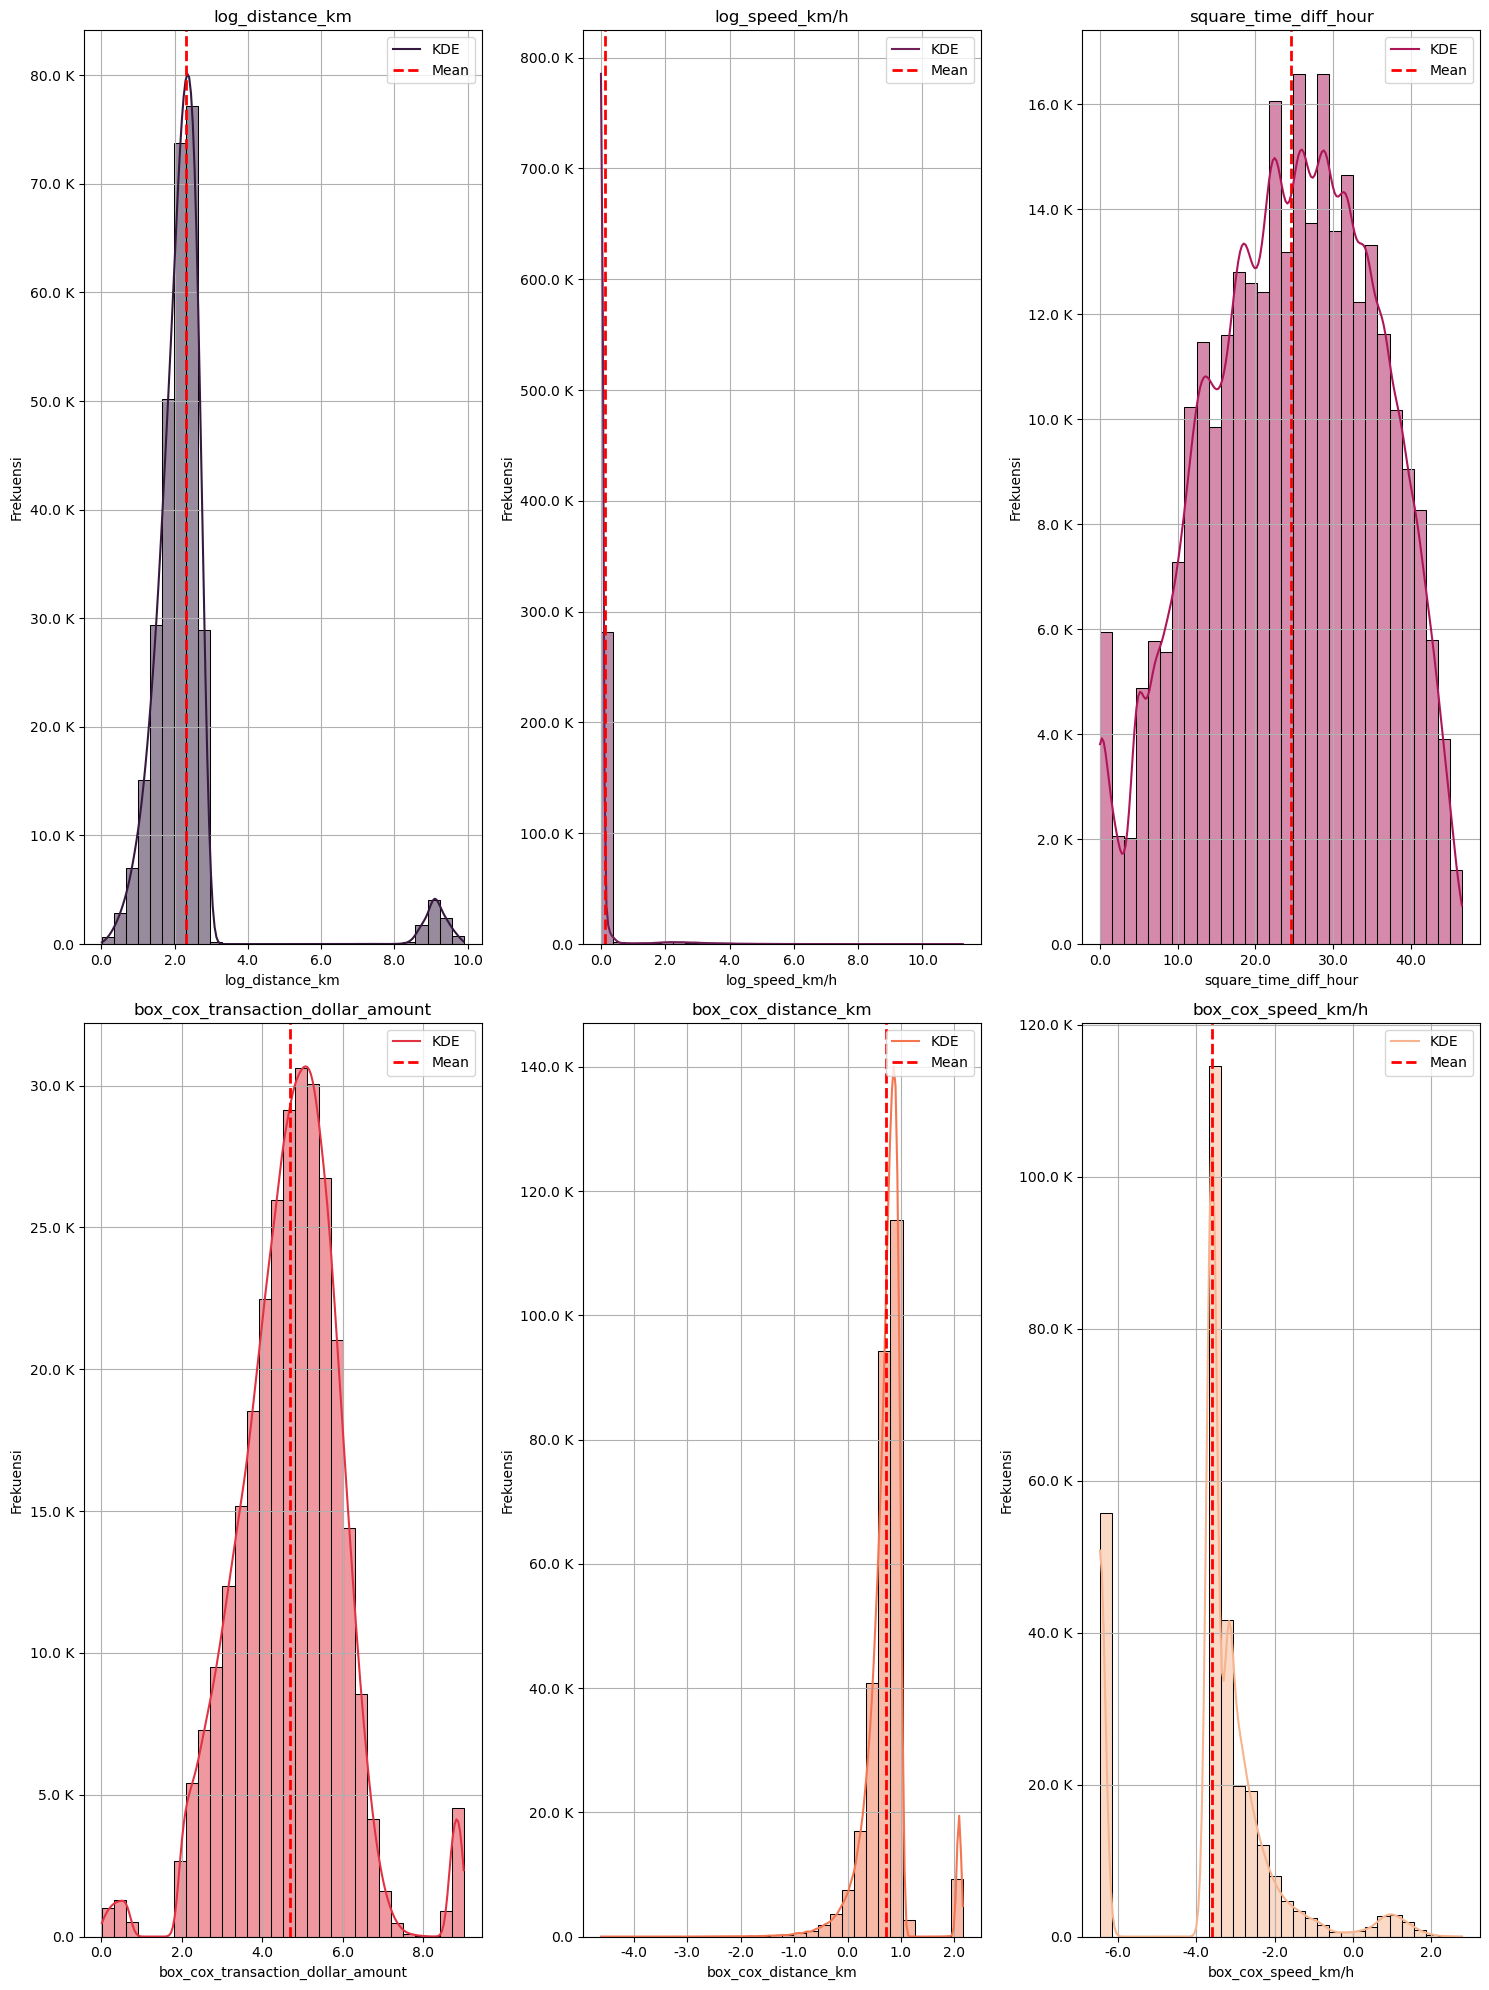

In [22]:
# Set up subplot grid
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 20))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [23]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year',
            'transaction_dollar_amount', 'time_diff_hour', 
            'distance_km', 'speed_km/h']
df_check = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   log_transaction_dollar_amount      294588 non-null  float64
 1   log_distance_km                    294588 non-null  float64
 2   log_speed_km/h                     294588 non-null  float64
 3   square_time_diff_hour              294588 non-null  float64
 4   box_cox_transaction_dollar_amount  294588 non-null  float64
 5   box_cox_distance_km                294588 non-null  float64
 6   box_cox_speed_km/h                 294588 non-null  float64
dtypes: float64(7)
memory usage: 15.7 MB


In [24]:
# Menghitung skewness dan kurtosis
skewness_values = df_check.skew()
kurtosis_values = df_check.kurtosis()

# Menentukan kolom yang masih perlu transformasi
columns_to_transform = skewness_values[(abs(skewness_values) > 0.5) | (kurtosis_values < 3)].index.tolist()

# Menampilkan hasil
print("Skewness: \n", skewness_values, '\n')
print("Kurtosis: \n", kurtosis_values, '\n')
print("Kolom yang perlu transformasi tambahan: ", columns_to_transform)

Skewness: 
 log_transaction_dollar_amount       -0.333596
log_distance_km                      4.179937
log_speed_km/h                       6.547365
square_time_diff_hour               -0.209238
box_cox_transaction_dollar_amount    0.033949
box_cox_distance_km                 -0.055784
box_cox_speed_km/h                   0.035218
dtype: float64 

Kurtosis: 
 log_transaction_dollar_amount         1.594619
log_distance_km                      19.318422
log_speed_km/h                       51.585244
square_time_diff_hour                -0.695071
box_cox_transaction_dollar_amount     1.470745
box_cox_distance_km                   7.970609
box_cox_speed_km/h                    1.010001
dtype: float64 

Kolom yang perlu transformasi tambahan:  ['log_transaction_dollar_amount', 'log_distance_km', 'log_speed_km/h', 'square_time_diff_hour', 'box_cox_transaction_dollar_amount', 'box_cox_speed_km/h']


In [25]:
sam =

SyntaxError: invalid syntax (1956161212.py, line 1)

### Outlier Check

#### Z-Score Methode
A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation

In [ ]:
cc_df.info()

In [ ]:
# Data
exc_data = ['credit_card', 'long', 'lat', 'zipcode', 'year']
sample_data = cc_df.select_dtypes(include = ['number']).drop(columns = exc_data, errors = 'ignore')

sample_data.columns

In [ ]:
# Data
sample_columns = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

sample_columns = sample_columns.drop(columns = exclude_col, errors = 'ignore').columns 

sample_data = cc_df[sample_columns]

# Set a threshold
threshold = 2

# Loop untuk memeriksa setiap kolom satu persatu
for col in sample_columns:
    # Data kolom
    col_data = sample_data[col]

    # Calculate Z-Score untuk kolom ini
    z_scores = (col_data - col_data.mean()) / col_data.std()

    # Filter out outliers
    outliers = col_data[np.abs(z_scores) >= threshold]
    non_outliers = col_data[np.abs(z_scores) < threshold]

    # Menampilkan hasil secara terstruktur untuk setiap kolom
    print(f"--- {col} ---")
    print('=' * 40)
    print(f"Z-Score Summary:")
    print(f"\tMean: {z_scores.mean()}")
    print(f"\tStandard Deviation: {z_scores.std()} \n")
    print(f"Outliers Threshold: {threshold}")
    
    # Menampilkan jumlah outliers dan non-outliers
    print(f"Outliers: {len(outliers)}")
    print(f"Non-Outliers: {len(non_outliers)} \n")
    
    # Tampilkan beberapa outliers dan non-outliers
    print("Sample of Outliers:")
    print(f"{outliers.head()} \n")  # Tampilkan beberapa outliers

    print("Sample of Non-Outliers:")
    print(f"{non_outliers.head()} \n")  # Tampilkan beberapa non-outliers
    print('=' * 40)
    print("\n")  # Spasi antar kolom

# Hasil akhir
print(f"Completed processing for all columns.")

#### IQR Methode

In [ ]:
# Data
box_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# DataFrame columns to check for outliers
columns_to_check = ['box_cox_credit_card_limit', 'log_transaction_dollar_amount']

# Function to calculate IQR and filter outliers
def filter_outliers(df, columns):
    while True:
        outlier_indices = set()
        
        for col in columns:
            Q1 = np.percentile(df[col], 25, method = 'midpoint')
            Q3 = np.percentile(df[col], 75, method = 'midpoint')
            IQR = Q3 - Q1
            
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            col_outliers = df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].index
            outlier_indices.update(col_outliers)
        
        # If no outliers are found, break the loop
        if not outlier_indices:
            break
        
        # Remove outliers
        df.drop(index=outlier_indices, inplace=True)
    
    return df

# Apply the function
cc_df_cleaned = filter_outliers(cc_df.copy(), columns_to_check)

# Display the old and new shape of the DataFrame
print(f'Old Shape: {cc_df.shape}')
print(f'New Shape: {cc_df_cleaned.shape}')

In [ ]:
# clean data
cc_df = cc_df_cleaned.copy()

#### Re-Checking

In [ ]:
# Data
box_data = cc_df_cleaned.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month', 
               'transaction_count', 'time_diff_per_seconds', 'prev_long', 'prev_lat', 'distance', 
               'credit_card_limit', 'transaction_dollar_amount', 
               'square_credit_card_limit', 'box_cox_transaction_dollar_amount']

box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# drop unnecessary column
drop_col = ['log_transaction_dollar_amount', 'square_credit_card_limit', 
            'box_cox_credit_card_limit', 'box_cox_transaction_dollar_amount']

cc_df = cc_df.drop(drop_col, axis = 1)

### Check Imbalanced Data

#### Proportion

In [ ]:
# Check proportion
print(f'{cc_df["fraud_status"].value_counts()} \n')
print(round(cc_df["fraud_status"].value_counts(normalize = True) * 100, 2))

#### Imbalance Ratio

In [ ]:
# 
minority_class = cc_df["fraud_status"].value_counts().min()
majority_class = cc_df["fraud_status"].value_counts().max()

# 
imbalance_ratio = majority_class / minority_class
print(f"Imbalance Ratio (IR): {imbalance_ratio:.2f}")

## Basic Visualization

In [ ]:
cc_df.head()

### Heatmap

In [ ]:
# Date & Numeric Correlations
correlations_data = cc_df.select_dtypes(include = 'number')

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 
               'prev_long', 'prev_lat']

correlations_data = correlations_data.drop(columns = exclude_col)

# List of correlation methods to be used
sample_methods = ['pearson', 'spearman', 'kendall']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_features = correlations_data.columns

# Plotting correlation heatmap for each method
for method in sample_methods:
    # Creat canvas
    plt.figure(figsize = (24, 12))  # Set the figure size for each heatmap
    plt.title(f'Correlation Heatmap using {method.upper()} Method', fontsize = 20)

    # Calculate correlation for the current method
    corr_matrix = correlations_data.corr(method = method).round(2)

    # Plot heatmap
    sns.heatmap(corr_matrix, cmap = "YlGnBu", annot = True)
    plt.show()

    # Variance Inflation Factor (VIF)
    X = correlations_data[vif_features]
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    print(f"VIF {method.upper()} Method :\n{round(vif_data, 2)} \n")

### Uni-variate Analyst

In [ ]:
cat_df = cc_df.select_dtypes(include = 'object')
cat_df.head()

In [ ]:
for i in cat_df.columns:
    print(f'{i.upper()} \t: {cat_df[i].unique()} \n')
    print(f'{"-" * 50} \n')

#### State

In [ ]:
# Specific column
var = 'state'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### City

In [ ]:
# Specific column
var = 'city'

# Mengambil 10 kategori teratas berdasarkan jumlah kemunculannya
top_categories = cc_df[var].value_counts().index[:5]

# Canvas
plt.figure(figsize = (12, 8))

# Count Plot dengan membatasi kategori yang ditampilkan
ax1 = plt.subplot(1, 2, 1)

# Filter data untuk menampilkan hanya kategori teratas atau "Others"
filtered_df = cc_df[cc_df[var].isin(top_categories)]

# Count Plot dengan filtered data
sns.countplot(x = var, data = filtered_df, ax = ax1, hue = var, palette = 'Set2', order = top_categories)

# Menambahkan judul dan label
ax1.set_title(f'Top 5 - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan teks pada setiap batang di countplot
for p in ax1.patches:
    height = p.get_height()
    if height > 0:  # Hanya tambahkan teks jika nilai lebih besar dari nol
        ax1.text(
            p.get_x() + p.get_width() / 2,
            height + 0.1,  # Menempatkan teks di atas batang
            f'{val_round(height)}',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 10)

# Pie Chart dengan kategori teratas
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()

# Hanya menampilkan kategori teratas untuk pie chart
top_counts = counts.head(5)
ax2.pie(top_counts, labels = top_counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(top_counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Season

In [ ]:
# specific column
var = 'season'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Week Category

In [ ]:
# specific column
var = 'week_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Day

In [ ]:
# specific column
var = 'day'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Limit Category

In [ ]:
# specific column
var = 'limit_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Geo Category

In [ ]:
# specific column
var = 'geo_cat'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

#### Fraud Status

In [ ]:
# specific column
var = 'fraud_status'

# canvas
plt.figure(figsize = (12, 8))

# Count Plot 
ax1 = plt.subplot(1, 2, 1)  
sns.countplot(x = var, data = cc_df, ax = ax1, hue = var, palette = 'Set2', legend = True, order = cc_df[var].value_counts().index)

# Menambahkan judul dan label
ax1.set_title(f'Total - {var} Transactions', fontsize = 12)
ax1.set_xlabel(var, fontsize = 10)  
ax1.set_ylabel('Count', fontsize = 10)  

# Menambahkan formatter untuk y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Menambahkan text pada setiap batang di countplot
for p in ax1.patches:
    # ambil tinggi batang
    height = p.get_height()
    
    # hanya menambahkan teks jika tinggi batang lebih dari 0
    if height > 0:
        ax1.text(p.get_x() + p.get_width() / 2, height + 0.1,  # Menempatkan teks di atas batang
                 f'{val_round(height)}', ha = 'center', va = 'bottom', fontsize = 10)  # Teks di tengah atas batang


# Pie Chart
ax2 = plt.subplot(1, 2, 2)
counts = cc_df[var].value_counts()
ax2.pie(counts, labels = counts.index, autopct = '%0.2f%%', startangle = 90, colors = sns.color_palette("Set3", len(counts)))
ax2.set_title(f'Pie Chart - {var}', fontsize = 12)

# Adjust layout
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

### Bi-variate Analyst

In [ ]:
# 
bi_df = cat_df.copy()
bi_df = bi_df.drop(labels = ['quarter', 'month'], axis = 1)
bi_df.head()

In [ ]:
from itertools import combinations

# Mencari pasangan kolom yang akan diuji
categorical_columns = bi_df.columns
column_pairs = list(combinations(categorical_columns, 2))  # Membuat pasangan kolom

# Menyimpan pasangan dengan hubungan signifikan
significant_pairs = []

# Melakukan uji Chi-Square untuk setiap pasangan kolom
alpha = 0.05  # Threshold signifikansi

for col1, col2 in column_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])  # Membuat tabel kontingensi
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  # Uji Chi-Square
    
    print(f"Chi-Square Test antara {col1} dan {col2}:")
    print('=' * 50)

    print(f"\t Statistik Chi-Square: {chi2:.4f}")
    print(f"\t p-value: {p:.4f} \n")
    # print(f"\t Degrees of Freedom: {dof} \n")

    # Cek apakah hubungan signifikan
    if p < alpha:
        print(f"Test antara {col1} dan {col2} → TERDAPAT hubungan signifikan antara variabel \n")
        significant_pairs.append((col1, col2, p))  # Simpan pasangan signifikan

    else:
        print(f"Test antara {col1} dan {col2} → TIDAK ADA hubungan signifikan \n")

    print('=' * 50)

In [ ]:
# Menampilkan daftar pasangan dengan hubungan signifikan
if significant_pairs:
    print("\nPasangan variabel dengan hubungan signifikan (p < 0.05):")

    for col1, col2, p in significant_pairs:
        print(f"👉 {col1} ↔ {col2} (p-value: {p:.4f})")

else:
    print("\nTidak ada pasangan variabel yang memiliki hubungan signifikan (p ≥ 0.05).")

In [ ]:
def cramers_v(chi2, n, dof):
    return np.sqrt(chi2 / (n * dof))

selected_vars = set()

for col1, col2, p in significant_pairs:
    contingency_table = pd.crosstab(bi_df[col1], bi_df[col2])
    chi2, _, dof, _ = stats.chi2_contingency(contingency_table)
    n = bi_df.shape[0]
    
    cramer_v_value = cramers_v(chi2, n, dof)
    print(f"Cramér’s V untuk {col1} ↔ {col2}: {cramer_v_value:.4f}")

    if cramer_v_value > 0.3:  # Hanya memilih hubungan kuat (> 0.3)
        selected_vars.add(col1)
        selected_vars.add(col2)

In [ ]:
print("✅ Kategori variabel yang dipilih untuk analisis selanjutnya:", selected_vars)

In [ ]:
# check
cc_df.select_dtypes(include = 'number').columns

#### Fraud Status

In [ ]:
monthly_fraud = cc_df.groupby(['month', 'fraud_status'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
monthly_fraud = pd.DataFrame(monthly_fraud)
monthly_fraud = monthly_fraud.reset_index()
monthly_fraud

In [ ]:
# Plot dengan skala logaritmik
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = monthly_fraud, x = "month", y = "total", hue = "fraud_status", palette = ["red", "blue"])

# Menampilkan nilai di atas batang dengan format singkat
for p in ax.patches:
    height = p.get_height()
    ax.annotate(val_round(height), 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'bottom', fontsize = 10, color = 'black', xytext = (0, 5),
                textcoords = 'offset points')

# Mengatur skala logaritmik agar data lebih proporsional
ax.set_yscale("log")

# Mengatur format label sumbu y
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))

# Labels dan title
plt.title("Fraud vs. Not Fraud Transactions per Month")
plt.xlabel("Month")
plt.ylabel("Credit Card Transactions (Log Scale)")

plt.legend(title = "Transactions Status", loc = 'best')
plt.tight_layout()
plt.xticks(rotation = 45)

plt.show()


#### Fraud Transactions

In [ ]:
transactions_fraud = cc_df.groupby(['month', 'fraud_status'], observed = False).agg({'transaction_dollar_amount': 'sum'}).rename(columns = {'transaction_dollar_amount': 'total'})
transactions_fraud = pd.DataFrame(transactions_fraud).reset_index()
transactions_fraud = transactions_fraud[transactions_fraud['fraud_status'] == 'fraud'].drop(columns = 'fraud_status').reset_index(drop = True)

transactions_fraud

In [ ]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = transactions_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(transactions_fraud))]  # Explode the highest slice

plt.pie(transactions_fraud["total"], 
        labels = transactions_fraud["month"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Total Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Top Fraud City

In [ ]:
city_fraud = cc_df.groupby(['city', 'fraud_status'], observed = False).agg({'credit_card': 'count'}).rename(columns = {'credit_card': 'total'})
city_fraud = pd.DataFrame(city_fraud).reset_index()
city_fraud = city_fraud[city_fraud['fraud_status'] == 'fraud'].drop(columns = 'fraud_status').sort_values(by = 'total', ascending = False).reset_index(drop = True)
city_fraud = city_fraud.head()

city_fraud

In [ ]:
# Membuat Pie Chart
plt.figure(figsize = (12, 10))  # Ukuran plot

max_index = city_fraud["total"].idxmax()  # Find the index of the highest value
explode = [0.1 if idx == max_index else 0 for idx in range(len(city_fraud))]  # Explode the highest slice

plt.pie(city_fraud["total"], 
        labels = city_fraud["city"], 
        autopct = '%1.1f%%', 
        startangle = 90, 
        explode = explode)

# Tambahkan Judul
plt.title("Top City Fraud / Month")

# Tampilkan Plot
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Write Data

In [ ]:
# 
pickle_data = cc_df.copy()
pickle_data.info()

In [ ]:
pickle_data.head()

#### Hashing Data

In [ ]:
# Add key column
pickle_data['cc_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)
pickle_data['trx_id'] = pickle_data.index.astype(str) + '-' + np.random.random(len(pickle_data)).astype(str)

# check specific duplicate
print(f"Total Specific Duplicate: {pickle_data['credit_card'].duplicated().sum()}")
print(f"Total Specific Duplicate: {pickle_data['trx_id'].duplicated().sum()}")

In [ ]:
# Fungsi untuk melakukan hashing dengan penanganan NaN
def hash_with_sha256(value):
    if pd.isna(value):  
        return None  
    
    return hashlib.sha256(value.encode()).hexdigest()

# Terapkan fungsi hashing ke kolom yang diinginkan
pickle_data['cc_id'] = pickle_data['cc_id'].apply(hash_with_sha256)
pickle_data['trx_id'] = pickle_data['trx_id'].apply(hash_with_sha256)

pickle_data.head()

In [ ]:
# Check Duplicate
print(f'Total CC Id Duplicate: {pickle_data["cc_id"].duplicated().sum()}')
print(f'Total Transactions Id Duplicate: {pickle_data["trx_id"].duplicated().sum()}\n')

# Check unique table
print(f'Is CC Id unique: {pickle_data["cc_id"].is_unique}')
print(f'Is Transactions Id unique: {pickle_data["trx_id"].is_unique}')

In [ ]:
pickle_data = pickle_data.sort_values(by = 'datetime', ascending = True).reset_index(drop = True)
pickle_data.head()

In [ ]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

In [ ]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(pickle_data)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

In [ ]:
# save pickle
with open(share['CLEAN_DATA'], 'wb') as f:
    pickle.dump(pickle_data, f)

## Data Mart

In [ ]:
csv_data = pickle_data.copy()
csv_data.columns

### cc_info

In [ ]:
cc_info_list = ['cc_id', 'credit_card', 'state', 'city', 'zipcode', 
                'year', 'quarter', 'month', 'season', 'week_cat', 'day',
                'credit_card_limit', 'limit_cat']

cc_info_dm = csv_data[cc_info_list]
cc_info_dm.head()

In [ ]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

In [ ]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_info_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

In [ ]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_info_write = share['CC_INFO'] 

# save to csv
cc_info_dm.to_csv(cc_info_write, index = False, sep = ';')
print('Data has been saved')

### cc_transactions

In [ ]:
cc_transactions_list = ['cc_id', 'trx_id', 'datetime', 'transaction_dollar_amount', 'transaction_count', 
                        'time_diff_per_seconds', 'long', 'prev_long', 'lat', 'prev_lat', 
                        'distance', 'geo_cat', 'fraud_status']

cc_transactions_dm = csv_data[cc_transactions_list]
cc_transactions_dm.head()

In [ ]:
# Tentukan folder tujuan
dir_name = 'datamart'
folder_path = f"../{dir_name}"

# Cek apakah folder sudah ada, jika belum buat foldernya
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    
    print(f"Directory '{dir_name}' created successfully.")

else: 
    print(f'Directory has already been created.')

In [ ]:
# calculate dataframe size
total_size_bytes = sys.getsizeof(cc_transactions_dm)

# Converse bytes to MB
total_size_mb = total_size_bytes / 1048576
print(f"Total size of DataFrame: {total_size_mb:.2f} MB")

In [ ]:
# parameter
share = {**dotenv_values('../.env.shared')} 

cc_transactions_write = share['CC_TRANSACTIONS'] 

# save to csv
cc_transactions_dm.to_csv(cc_transactions_write, index = False, sep = ';')
print('Data has been saved')

# Problem Statement

1. How to achieve efficiency and accuracy in detecting fraudulent transactions in order to reduce financial losses?